Car-Price-Predicator

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as pd
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [186]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head(n=3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [187]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [188]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [190]:
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [191]:
# df.CarName.unique()
carcompany=[]
for i in df['CarName']:
    carcompany.append(str(i.split(' ')[0]))


In [192]:
df['carcompany']=np.array(carcompany)

In [193]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [194]:
non_numeric_values = df['price'][pd.to_numeric(df['price'], errors='coerce').isnull()]
print(non_numeric_values)


Series([], Name: price, dtype: float64)


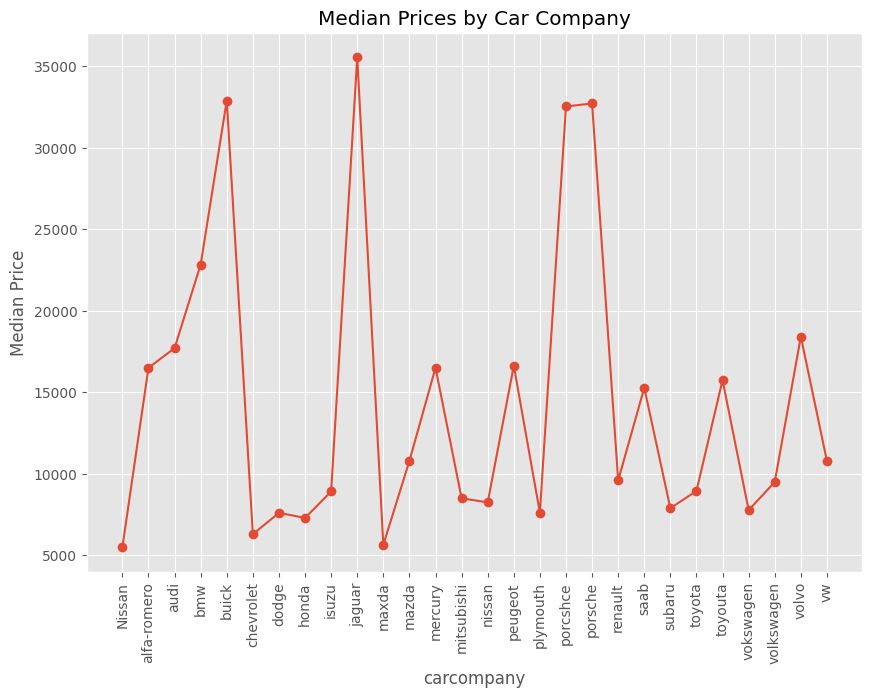

In [195]:
# Set plot style
plt.style.use('ggplot')

# Plot median prices grouped by car company
plt.figure(figsize=(10, 7))
plt.plot(df.groupby('carcompany')['price'].median(), marker='o')
plt.title('Median Prices by Car Company')
plt.xlabel('carcompany')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [196]:
df.CarName=df.CarName.astype('category').cat.codes
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,5,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


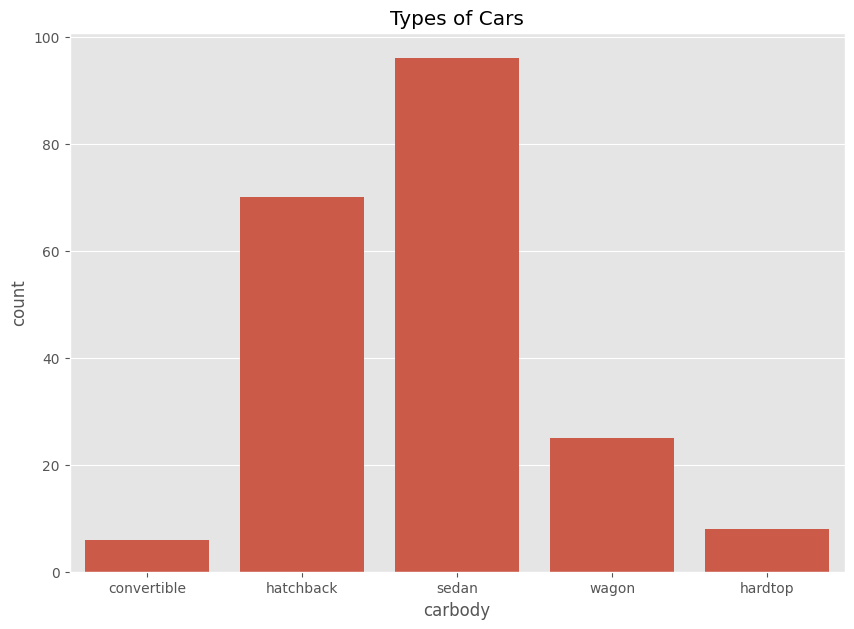

In [197]:
# Set plot style
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='carbody')  # Corrected the '-' to ','
plt.title('Types of Cars')
plt.show()


In [198]:
# Convert each categorical column to category codes separately
df['fuelsystem'] = df['fuelsystem'].astype('category').cat.codes
df['fueltype'] = df['fueltype'].astype('category').cat.codes
df['aspiration'] = df['aspiration'].astype('category').cat.codes
df['doornumber'] = df['doornumber'].astype('category').cat.codes
df['carbody'] = df['carbody'].astype('category').cat.codes
df['drivewheel'] = df['drivewheel'].astype('category').cat.codes
df['enginelocation'] = df['enginelocation'].astype('category').cat.codes
df['enginetype'] = df['enginetype'].astype('category').cat.codes
df['cylindernumber'] = df['cylindernumber'].astype('category').cat.codes
df['carcompany'] = df['carcompany'].astype('category').cat.codes


In [199]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [200]:
df.dtypes

car_ID                int64
symboling             int64
CarName               int16
fueltype               int8
aspiration             int8
doornumber             int8
carbody                int8
drivewheel             int8
enginelocation         int8
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype             int8
cylindernumber         int8
enginesize            int64
fuelsystem             int8
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
carcompany             int8
dtype: object

In [201]:
cor_matrix = np.array(df.corr())
for i in range(26):
    for j in range(26):
        if (np.abs(cor_matrix[i][j]) >= 0.85 and np.abs(cor_matrix[i][j]) < 1):
            print(f"{df.columns[i]}...co-related...{df.columns[j]}....{cor_matrix[i][j]}")


car_ID...co-related...CarName....0.9670768772317996
CarName...co-related...car_ID....0.9670768772317996
fueltype...co-related...compressionratio....-0.9843560568767543
wheelbase...co-related...carlength....0.874587475964264
carlength...co-related...wheelbase....0.874587475964264
carlength...co-related...curbweight....0.8777284608306433
carwidth...co-related...curbweight....0.8670324646791233
curbweight...co-related...carlength....0.8777284608306433
curbweight...co-related...carwidth....0.8670324646791233
curbweight...co-related...enginesize....0.850594073426277
enginesize...co-related...curbweight....0.850594073426277
enginesize...co-related...price....0.8741448025245117
compressionratio...co-related...fueltype....-0.9843560568767543
citympg...co-related...highwaympg....0.9713370423425045
highwaympg...co-related...citympg....0.9713370423425045
price...co-related...enginesize....0.8741448025245117


In [202]:
df.shape

(205, 27)

Modal Building

In [203]:
x_val=df.drop(['price'],axis=1)
y_val=df['price']

In [204]:
x_val.head(n=3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carcompany
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,1
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,1
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,1


In [205]:
x_train,x_test,y_train,y_test = train_test_split(x_val,y_val,train_size=0.8)
model = LinearRegression()
model.fit(x_train , y_train)

y_pred=model.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test , y_pred))
ac=model.score(x_test , y_test)



In [206]:
ac

0.9001361433780848

In [207]:
rmse

2319.3528586253565

In [208]:
def accuracy_generator(x_val , y_val , split=0.7):
    x_train , x_test , y_train , y_test = train_test_split(x_val , y_val , train_size=split)
    model=LinearRegression()
    model.fit(x_train , y_train)
    y_pred=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test , y_pred))
    ac=model.score(x_test , y_test)

    return rmse , ac    

In [209]:
arr_rmse = []
arr_ac = []

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, train_size=0.85)
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    accuracy = model.score(x_test, y_test)
    
    arr_rmse.append(rmse)
    arr_ac.append(accuracy)

print(f"The average RMSE is {round(np.average(arr_rmse), 2)}")
print(f"The average accuracy of the model is {round(np.average(arr_ac) * 100, 2)}%")


The average RMSE is 2966.2
The average accuracy of the model is 82.32%


In [210]:
import pickle as pk
# Train your model
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, train_size=0.85)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [211]:
pk.dump(model, open('model.pkl', 'wb'))

In [212]:
car_data = pd.read_csv("CarPrice_Assignment.csv")

# Get the column names of the DataFrame
column_names = car_data.columns.tolist()

print("Column Names in CarPrice_Assignment.csv:", column_names)

Column Names in CarPrice_Assignment.csv: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [215]:
# Check unique values in each column
for column in df.columns:
    print(column, df[column].unique())


car_ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
symboling [ 3  1  2  0 -1 -2]
CarName [  2   3   1   4   5   9   7   6   8  10  11  12  15  13  14  24  25  26
  35  27  32  34  29  28  30  33  31  39  43  37 

In [218]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'fueltype' column
df['fueltype'] = label_encoder.fit_transform(df['fueltype'])